### Image

In [8]:
import glob
import tiffile as tf
import matplotlib.pyplot as plt 
import imageio.v3 as iio
from matplotlib.backends.backend_pdf import PdfPages
import pickle
import numpy as np

In [9]:
img_dir = './tatz_anno_2d_cplm/'

In [10]:
img_files = sorted(glob.glob(f'{img_dir}*_img.tif'))
mask_files = sorted(glob.glob(f'{img_dir}*mask.tif'))
img_id = [item.split('/')[-1][:4] for item in img_files]
int_id =[int(item) for item in img_id] 

In [11]:
ori_imgs = ['/mnt/aperto/yin/data/image_masks/' +  item.split('/')[-1] for item in img_files]
ori_masks = ['/mnt/aperto/yin/data/image_masks/' +  item.split('/')[-1] for item in mask_files]

#### check image and mask

In [12]:
def get_mask(img_dir, img_id):
    mask_nw = img_dir + img_id + '_nw_mask.tif'
    mask_cp = img_dir + img_id + '_cp_mask.tif'
    mask_sd = img_dir + img_id + '_sd_mask.tif'
    mask_sw = img_dir + img_id + '_sw_mask.tif'
    return mask_nw, mask_cp, mask_sd, mask_sw
    

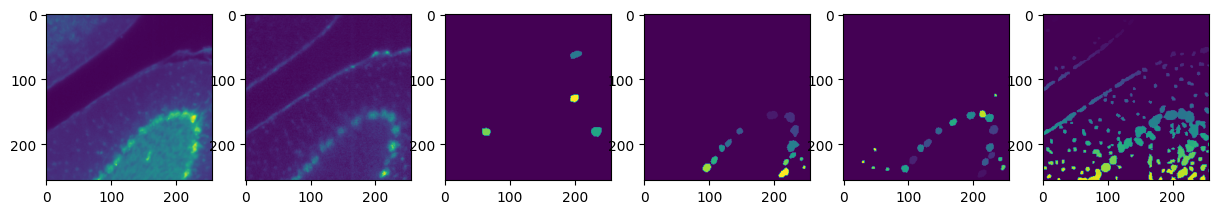

In [13]:
fig, ax = plt.subplots(1,6, figsize = (15,5))
check_id = 2
img = img_files[check_id]
img_id = img.split('/')[-1].split('_')[0]
mask_nw, mask_cp, mask_sd, mask_sw = get_mask(img_dir, img_id)

ax[0].imshow(tf.imread(img)[0])
ax[1].imshow(tf.imread(img)[1])
ax[2].imshow(tf.imread(mask_nw))
ax[3].imshow(tf.imread(mask_cp))
ax[4].imshow(tf.imread(mask_sd))
ax[5].imshow(tf.imread(mask_sw))


In [14]:
# Create a PdfPages object to save the figures
with PdfPages('./check_2d_pseudo.pdf') as pdf:
    for check_id in range(len(int_id)):
        fig, ax = plt.subplots(1,6, figsize = (15,5))
        img = img_files[check_id]
        img_id = img.split('/')[-1].split('_')[0]
        mask_nw, mask_cp, mask_sd, mask_sw = get_mask(img_dir, img_id)
        
        ax[0].imshow(tf.imread(img)[0])
        ax[1].imshow(tf.imread(img)[1])
        ax[2].imshow(tf.imread(mask_nw))
        ax[3].imshow(tf.imread(mask_cp))
        ax[4].imshow(tf.imread(mask_sd))
        ax[5].imshow(tf.imread(mask_sw))
        
        
        # Adjust layout
        plt.tight_layout()
        
        # Save the current figure into the PDF
        pdf.savefig(fig)
        
        # Close the figure to free memory
        plt.close(fig)

print("PDF saved successfully.")


PDF saved successfully.


### Check saved pickle

In [17]:
with open('./tatz_anno_2d_cplm/tatz_anno_2d_cplm.pkl', 'rb') as f:
    check_data = pickle.load(f)

In [18]:
check_data

,ID,integer_ID,instance_counts,corner,source,ref_channel,channel,crop_size,isHard,plane_position,model,select_plane
126,0126,126,4,"[93, 4958, 4866]",/mnt/aperto/fused/fused.n5,3,1,"[100, 256, 256]",0,44,n,True
191,0191,191,0,"[586, 6230, 3173]",/mnt/aperto/Tatz_brain_data/fused/fused.n5,3,4,"[100, 256, 256]",0,71,sw,True
61,0061,61,0,"[1261, 4581, 1261]",/mnt/aperto/fused/fused.n5,3,2,"[100, 256, 256]",0,49,sd,True
225,0225,225,0,"[1036, 5752, 2184]",/mnt/aperto/Tatz_brain_data/fused/fused.n5,3,4,"[100, 256, 256]",0,23,cp,True
163,0163,163,4,"[1054, 5523, 1508]",/mnt/aperto/Tatz_brain_data/fused/fused.n5,3,4,"[100, 256, 256]",0,49,n,True
